<a href="https://colab.research.google.com/github/chrispinciza01/Network_ID_Model_CCN-RNN/blob/main/rnn_ccn_model4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Python Libraries**

In [1]:
from keras.callbacks import CSVLogger, ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd  # For data processing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Reading Dataset

In [3]:
network_data = pd.read_csv("/content/drive/MyDrive/KEMU/Masters/Trimester 4/Thesis_project/dataset/CSE-CIC-IDS2018/CSE-CIC-IDS2018bclean_data.csv")

In [4]:
network_data

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209.0,744,0,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476965,80,6,23/02/2018 03:17:24,46,2,0,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476966,80,6,23/02/2018 10:47:35,277,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476967,80,6,23/02/2018 10:22:41,331,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection
2476968,80,6,23/02/2018 03:06:20,313,2,1,0,0.0,0,0,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,SQL Injection


# EDA Exploratory Data Analysis
Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data. EDA helps to find meaningful patterns in data. EDA provides in-depth insights into the data sets to solve our business problems. EDA gives a clue to impute missing values in the dataset

In [5]:
# prompt: ckeck if the data has nan values

network_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
# prompt: check if the data has  infinit values

import numpy as np
network_data.isin([np.nan, np.inf, -np.inf]).sum().to_numpy()


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 4484, 4484,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0])

In [7]:
# prompt: delete the infinit values in the network_data

import numpy as np
network_data = network_data.replace([np.inf, -np.inf], np.nan)
network_data = network_data.dropna()


In [8]:
network_data.isin([np.nan, np.inf, -np.inf]).sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In [ ]:
# Descriptive Statistics:
network_data.describe(include='all')

## separate Numerical and categorical variables for easy analysis

In [9]:
numerical_variables = network_data.select_dtypes(include=["int64", "float64"])
categorical_variables = network_data.select_dtypes(include=["object"])

In [10]:
print("Categorical Variables:")
print(categorical_variables.to_numpy())
print("Numerical Variables:")
print(numerical_variables.to_numpy())

Categorical Variables:
[['14/02/2018 08:31:01' 'Benign']
 ['14/02/2018 08:33:50' 'Benign']
 ['14/02/2018 08:36:39' 'Benign']
 ...
 ['23/02/2018 10:22:41' 'SQL Injection']
 ['23/02/2018 03:06:20' 'SQL Injection']
 ['23/02/2018 10:53:21' 'SQL Injection']]
Numerical Variables:
[[0.00000000e+00 0.00000000e+00 1.12641719e+08 ... 1.39300036e+02
  5.63209580e+07 5.63207610e+07]
 [0.00000000e+00 0.00000000e+00 1.12641466e+08 ... 1.14551299e+02
  5.63208140e+07 5.63206520e+07]
 [0.00000000e+00 0.00000000e+00 1.12638623e+08 ... 3.01934596e+02
  5.63195250e+07 5.63190980e+07]
 ...
 [8.00000000e+01 6.00000000e+00 3.31000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 6.00000000e+00 3.13000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.00000000e+01 6.00000000e+00 1.90000000e+02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [11]:
network_data['Label'].value_counts()

Label
Benign                  1024641
DDOS attack-HOIC         686012
Bot                      286191
FTP-BruteForce           193354
SSH-Bruteforce           187589
Infilteration             92403
DDOS attack-LOIC-UDP       1730
Brute Force -Web            362
Brute Force -XSS            151
SQL Injection                53
Name: count, dtype: int64

## visualizing the dataset by taking one variable at a time

Dst Port
Skew : 1.59


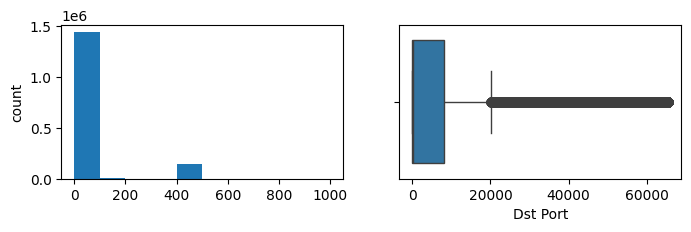

Protocol
Skew : 2.62


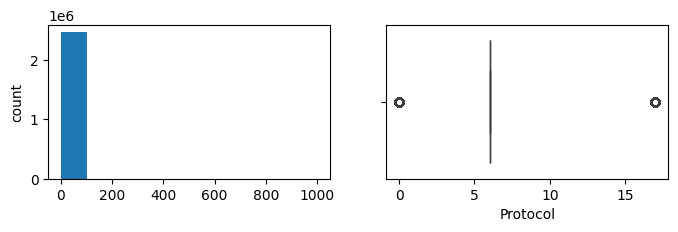

Flow Duration
Skew : -922.98


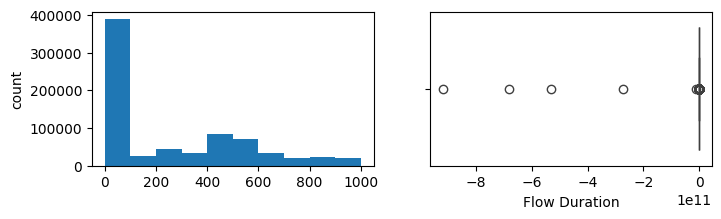

Tot Fwd Pkts
Skew : 40.81


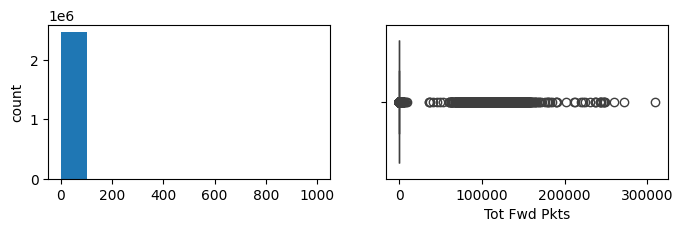

Tot Bwd Pkts
Skew : 99.18


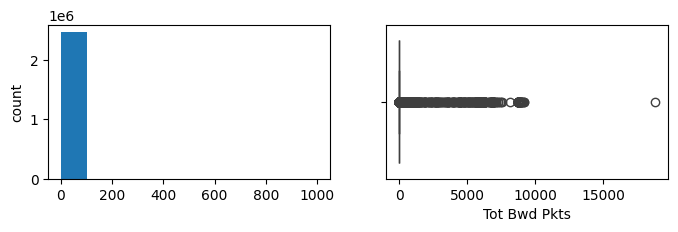

TotLen Fwd Pkts
Skew : 41.1


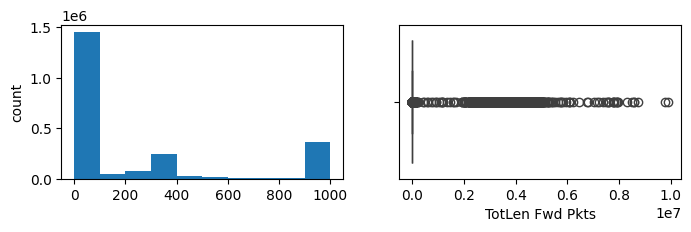

TotLen Bwd Pkts
Skew : 101.8


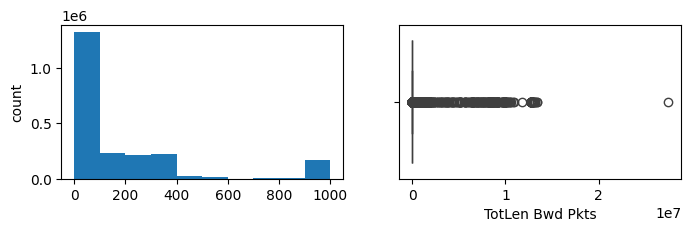

Fwd Pkt Len Max
Skew : 5.21


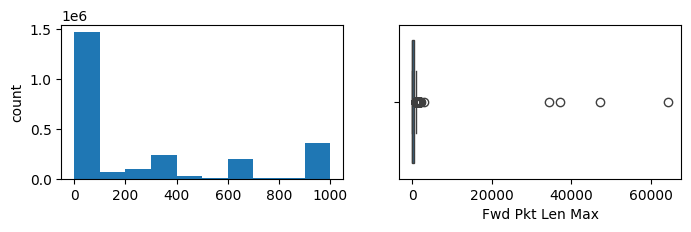

Fwd Pkt Len Min
Skew : 13.26


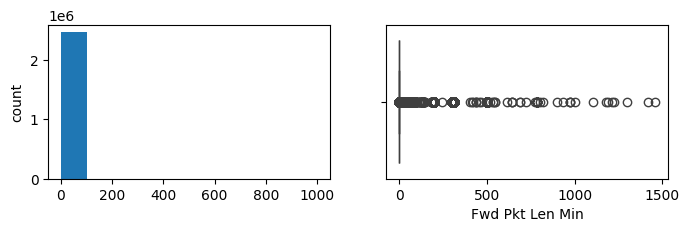

Fwd Pkt Len Mean
Skew : 4.56


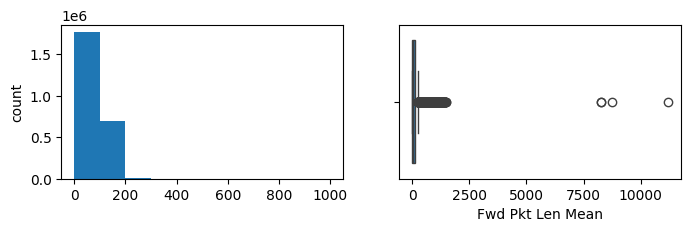

Fwd Pkt Len Std
Skew : 1.8


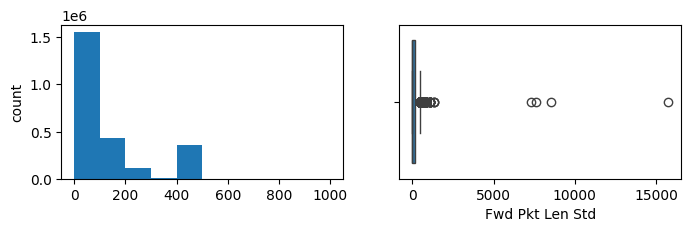

Bwd Pkt Len Max
Skew : 1.57


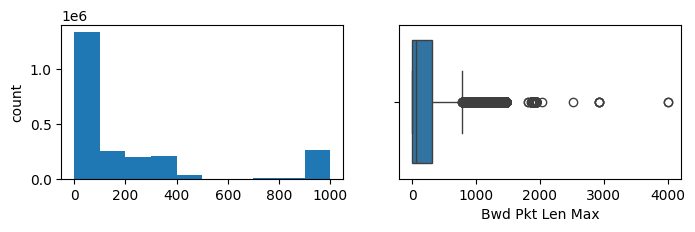

Bwd Pkt Len Min
Skew : 4.06


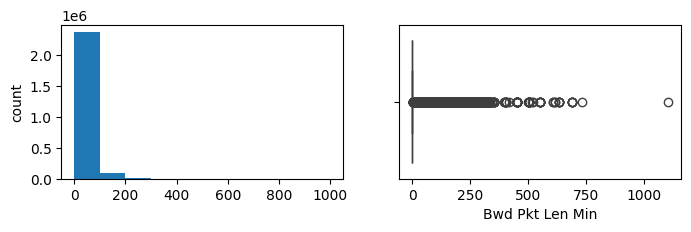

Bwd Pkt Len Mean
Skew : 3.79


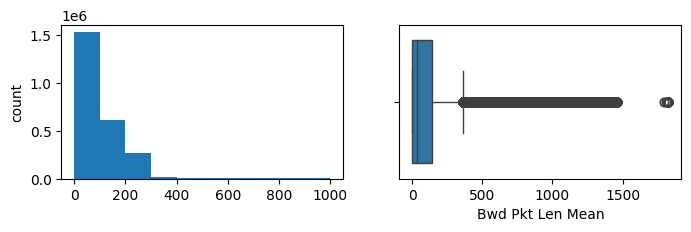

Bwd Pkt Len Std
Skew : 1.4


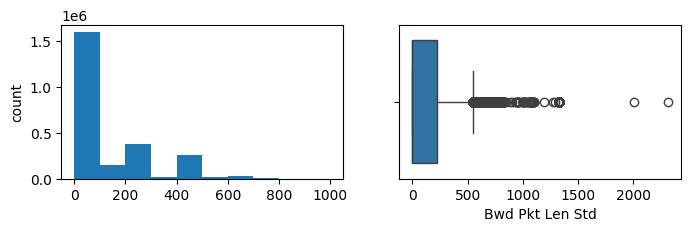

Flow Byts/s
Skew : 59.19


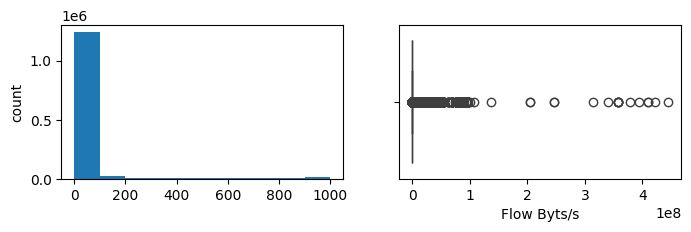

Flow Pkts/s
Skew : 3.92


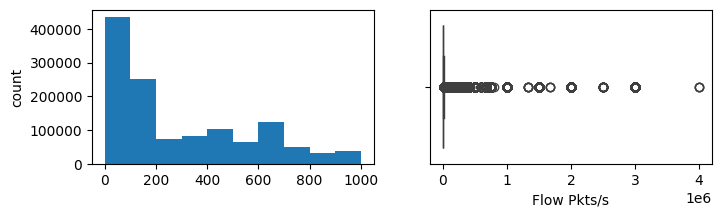

Flow IAT Mean
Skew : -1564.93


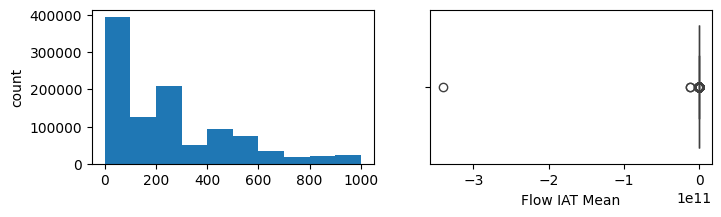

Flow IAT Std
Skew : 818.43


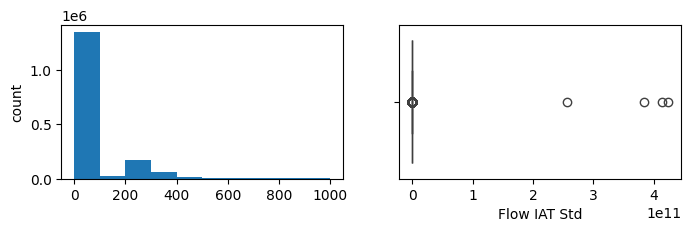

Flow IAT Max
Skew : 907.35


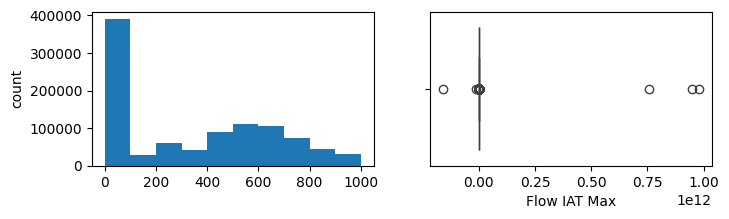

Flow IAT Min
Skew : -827.82


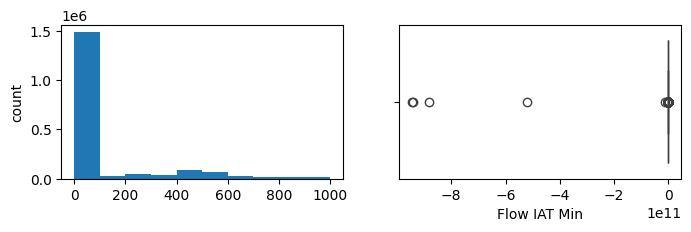

Fwd IAT Tot
Skew : -922.99


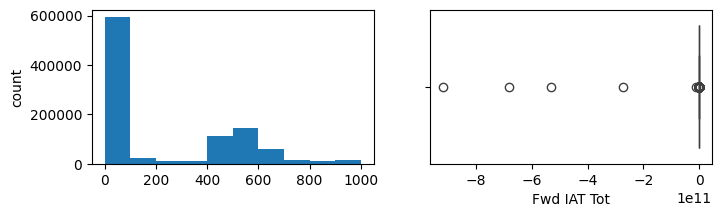

Fwd IAT Mean
Skew : -1564.87


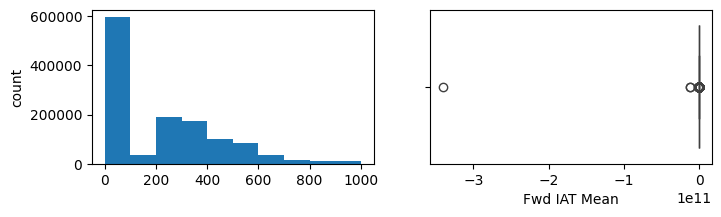

Fwd IAT Std
Skew : 818.43


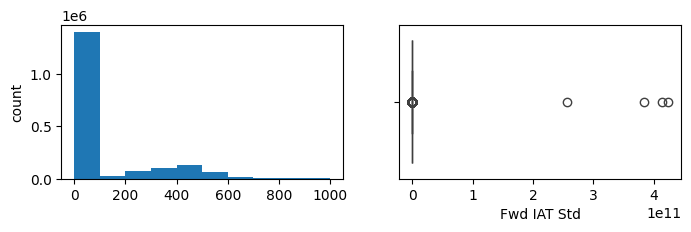

Fwd IAT Max
Skew : 907.36


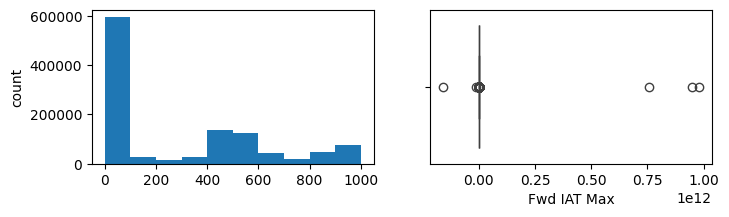

Fwd IAT Min
Skew : -827.82


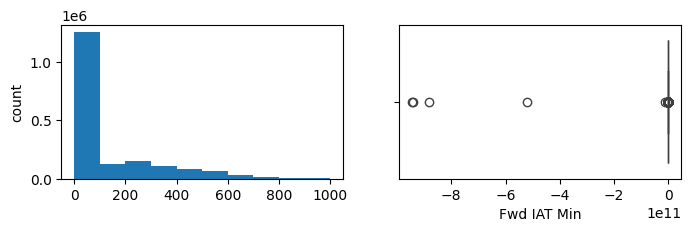

Bwd IAT Tot
Skew : 6.42


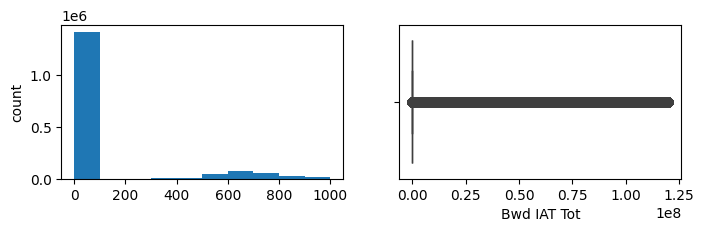

Bwd IAT Mean
Skew : 21.91


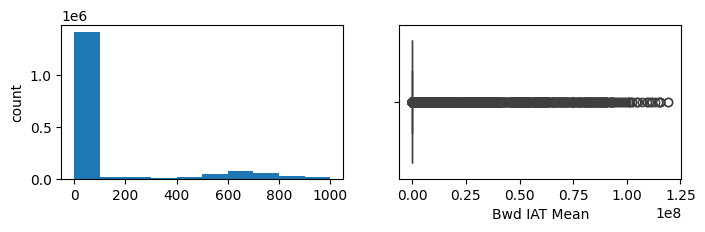

Bwd IAT Std
Skew : 10.5


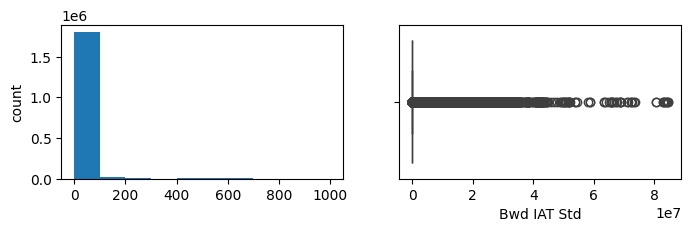

Bwd IAT Max
Skew : 9.42


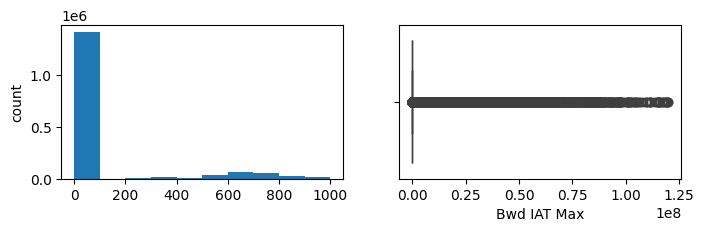

Bwd IAT Min
Skew : 46.9


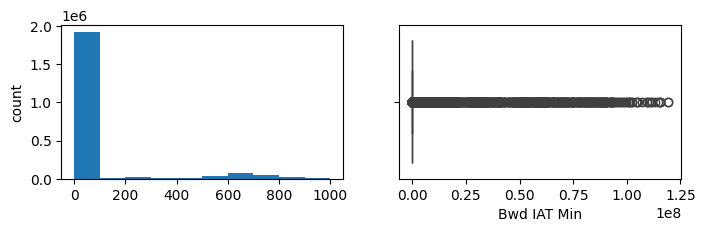

Fwd PSH Flags
Skew : 8.62


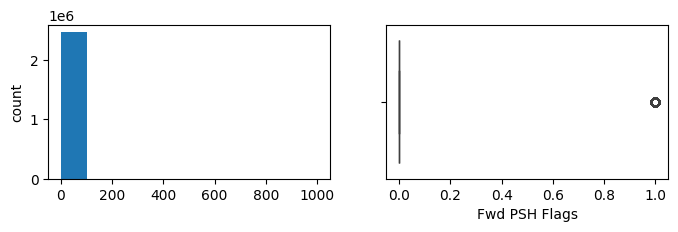

Bwd PSH Flags
Skew : 0


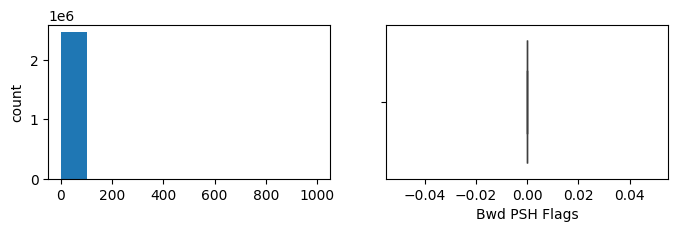

Fwd URG Flags
Skew : 54.45


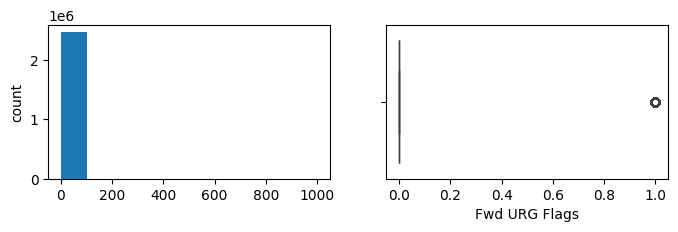

Bwd URG Flags
Skew : 0


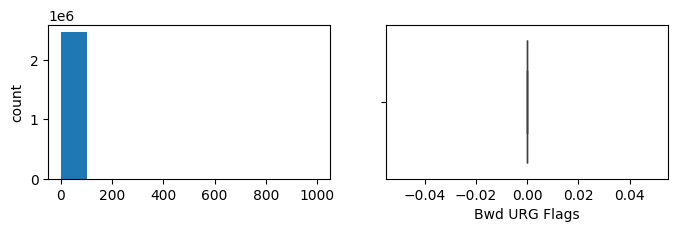

Fwd Header Len
Skew : 40.77


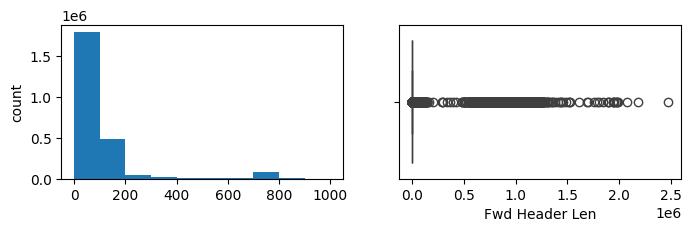

Bwd Header Len
Skew : 98.55


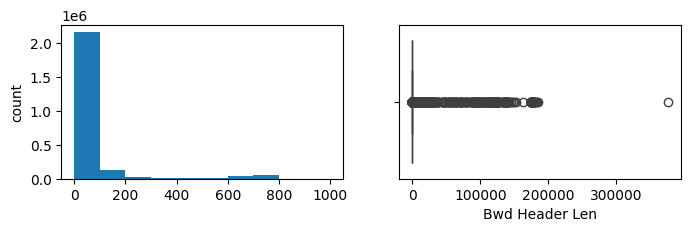

Fwd Pkts/s
Skew : 5.1


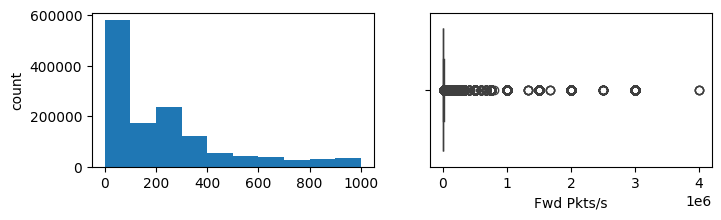

Bwd Pkts/s
Skew : 4.04


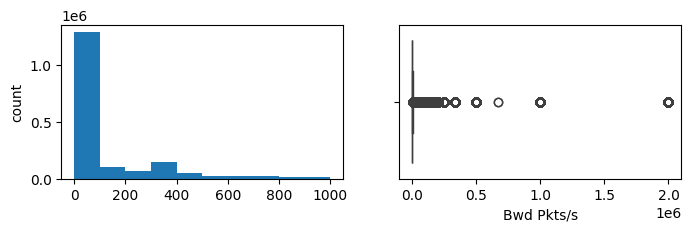

Pkt Len Min
Skew : 11.42


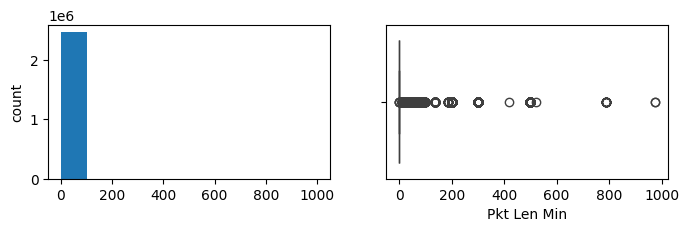

Pkt Len Max
Skew : 2.53


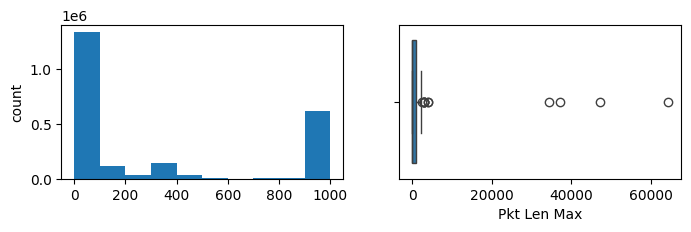

Pkt Len Mean
Skew : 3.05


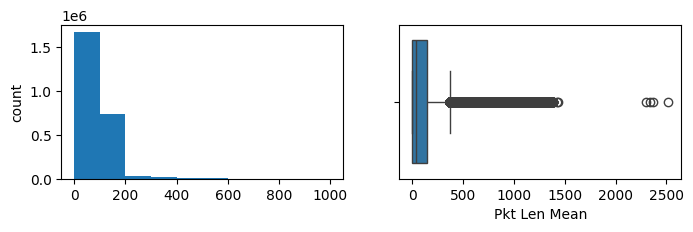

Pkt Len Std
Skew : 1.05


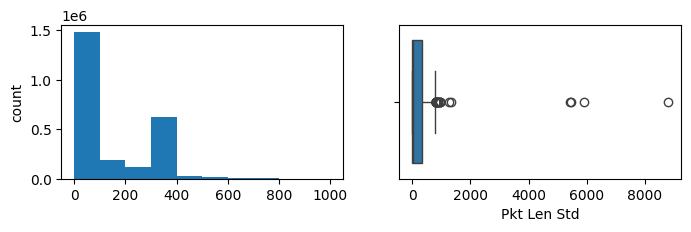

Pkt Len Var
Skew : 342.24


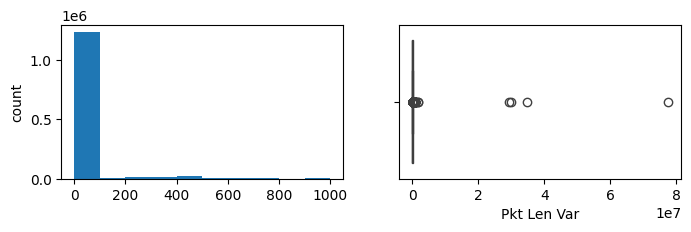

FIN Flag Cnt
Skew : 25.49


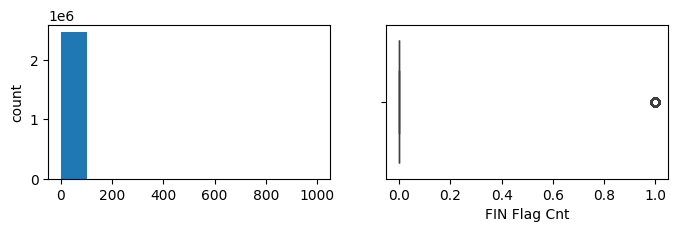

SYN Flag Cnt
Skew : 8.62


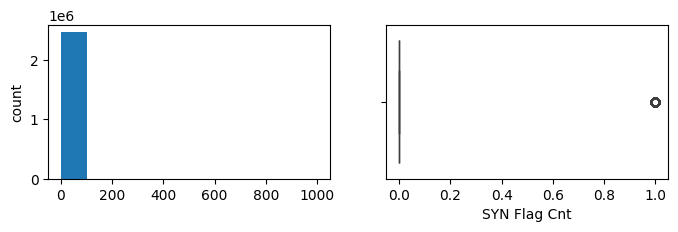

RST Flag Cnt
Skew : 0.91


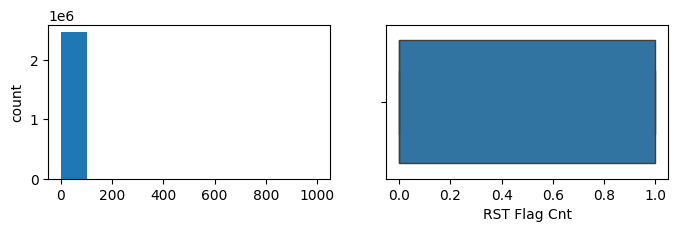

PSH Flag Cnt
Skew : -0.05


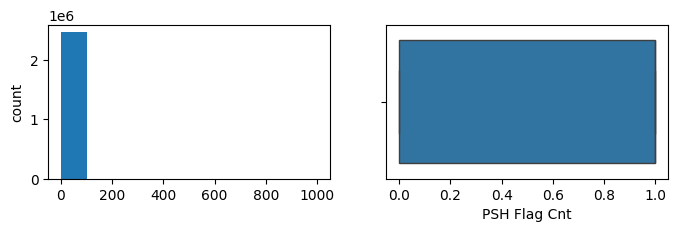

ACK Flag Cnt
Skew : 0.47


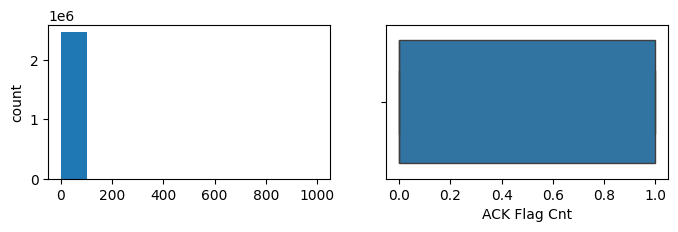

URG Flag Cnt
Skew : 3.99


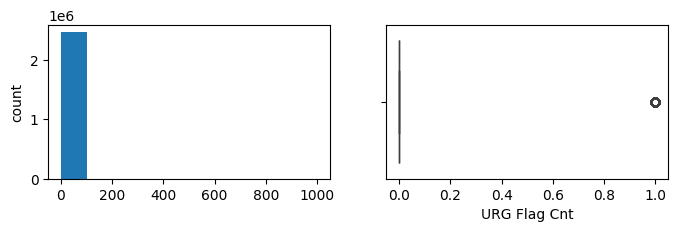

CWE Flag Count
Skew : 54.45


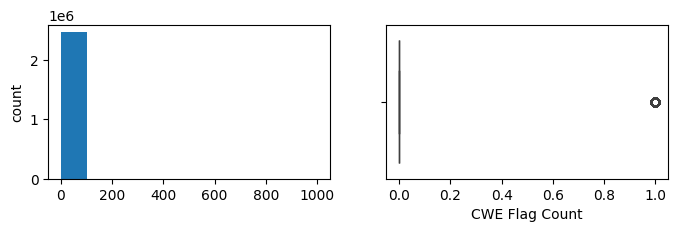

ECE Flag Cnt
Skew : 0.91


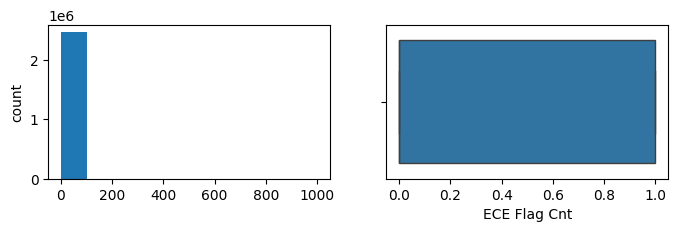

Down/Up Ratio
Skew : 15.36


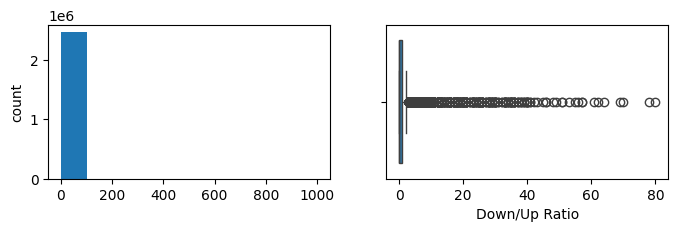

Pkt Size Avg
Skew : 2.5


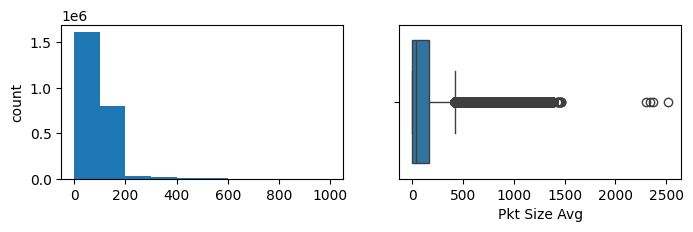

Fwd Seg Size Avg
Skew : 4.56


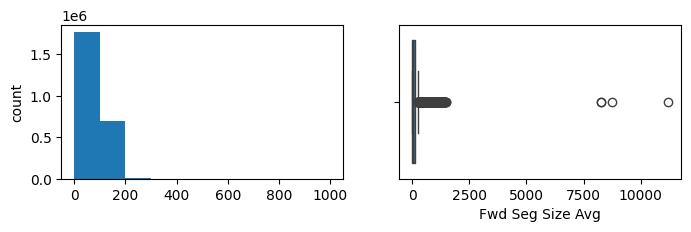

Bwd Seg Size Avg
Skew : 3.79


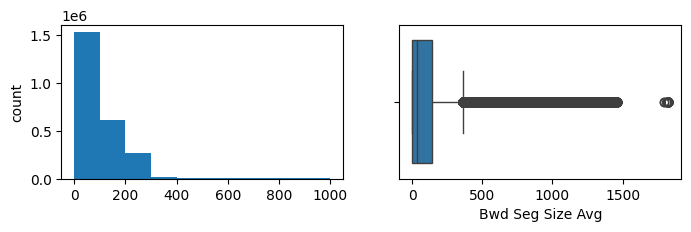

Fwd Byts/b Avg
Skew : 0


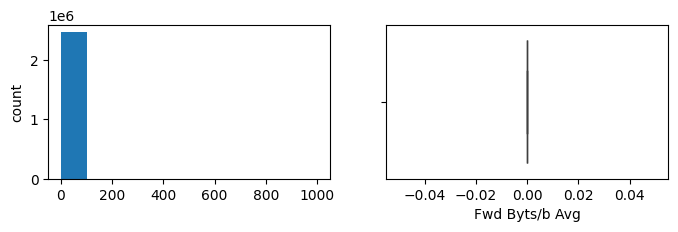

Fwd Pkts/b Avg
Skew : 0


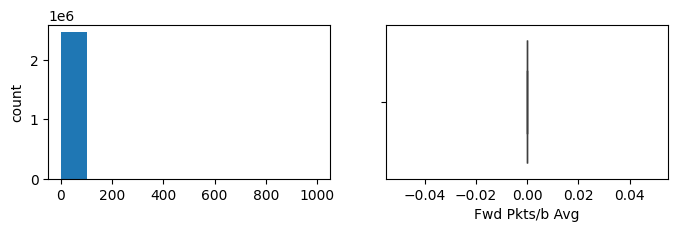

Fwd Blk Rate Avg
Skew : 0


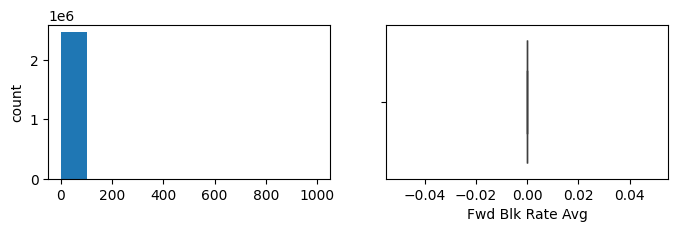

Bwd Byts/b Avg
Skew : 0


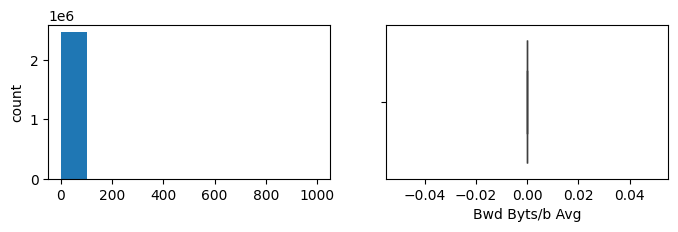

Bwd Pkts/b Avg
Skew : 0


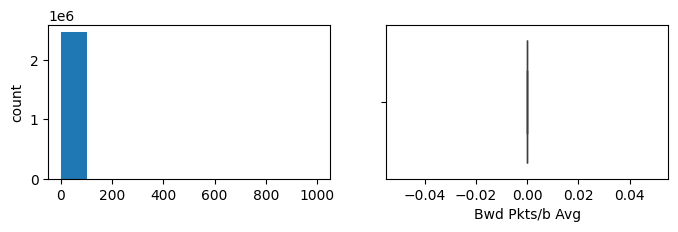

Bwd Blk Rate Avg
Skew : 0


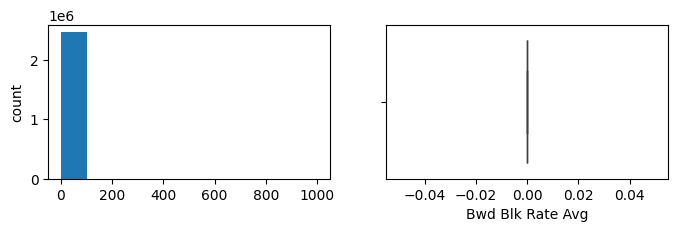

Subflow Fwd Pkts
Skew : 40.81


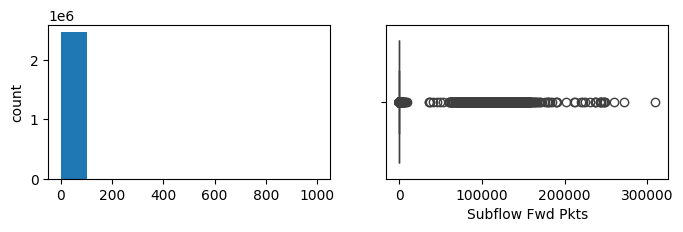

Subflow Fwd Byts
Skew : 41.1


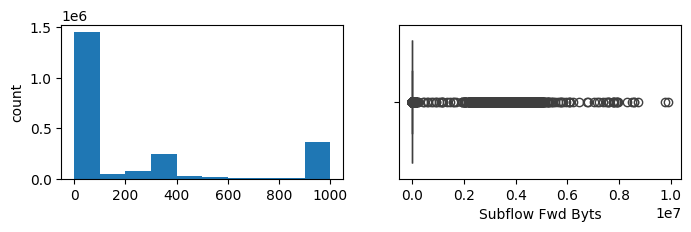

Subflow Bwd Pkts
Skew : 99.18


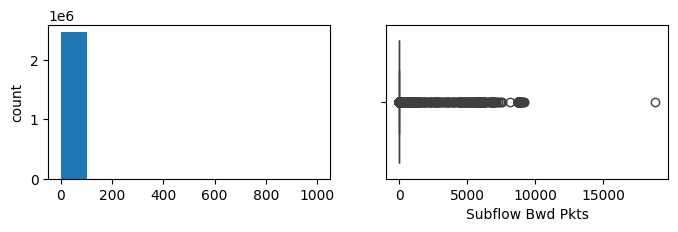

Subflow Bwd Byts
Skew : 101.78


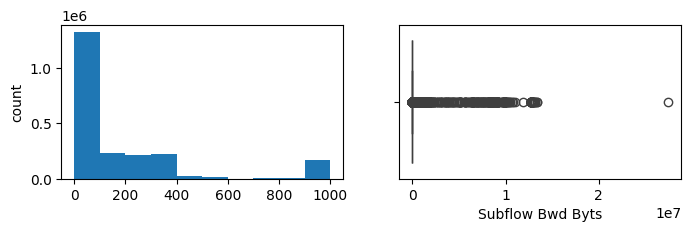

Init Fwd Win Byts
Skew : 0.56


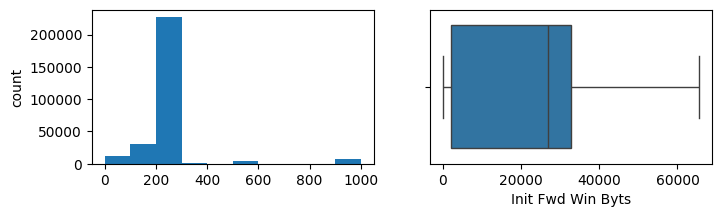

Init Bwd Win Byts
Skew : 2.08


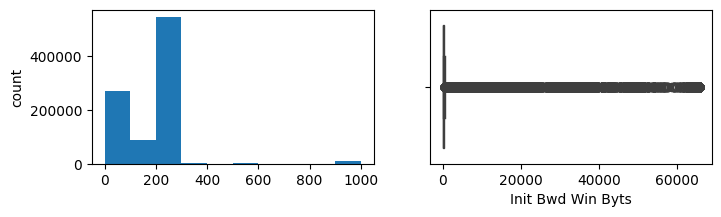

Fwd Act Data Pkts
Skew : 40.81


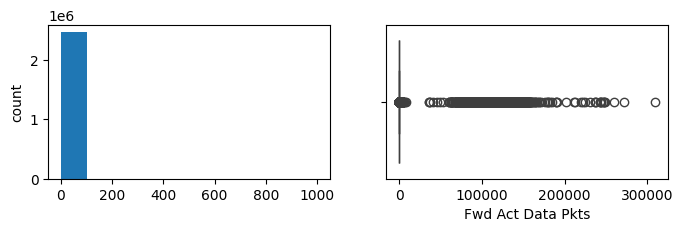

Fwd Seg Size Min
Skew : 0.77


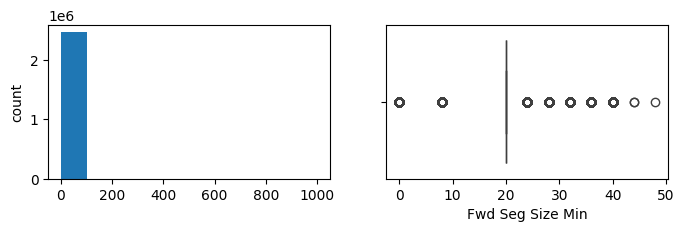

Active Mean
Skew : 71.39


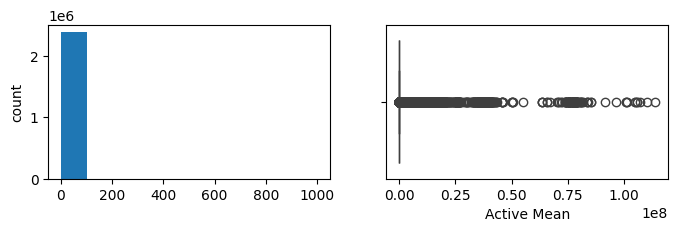

Active Std
Skew : 91.23


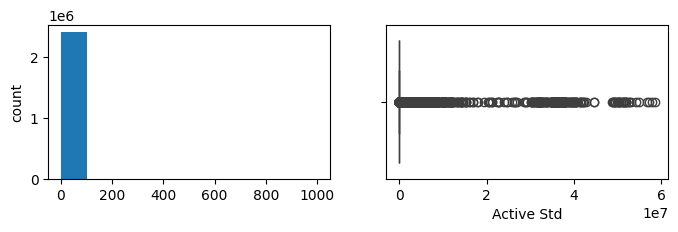

Active Max
Skew : 57.35


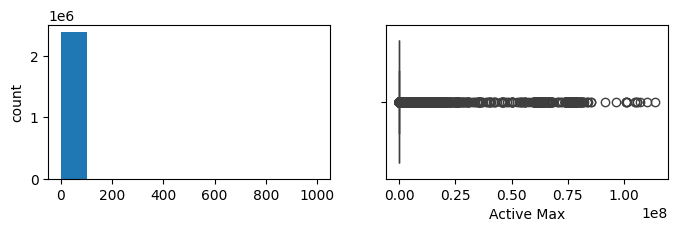

Active Min
Skew : 88.97


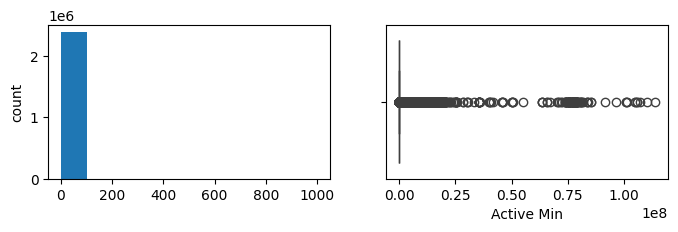

Idle Mean
Skew : 915.16


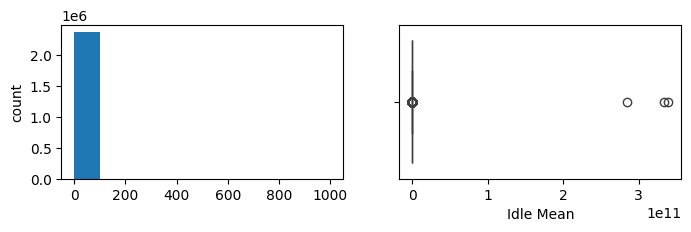

Idle Std
Skew : 920.55


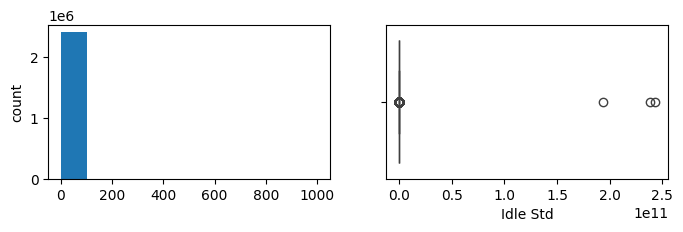

Idle Max
Skew : 923.44


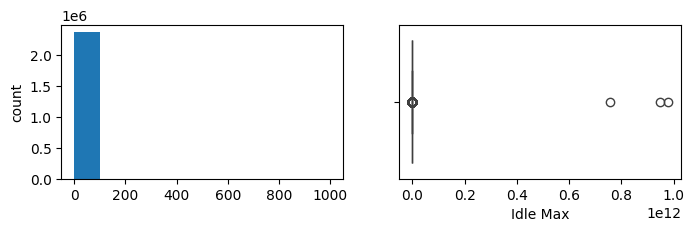

Idle Min
Skew : 590.07


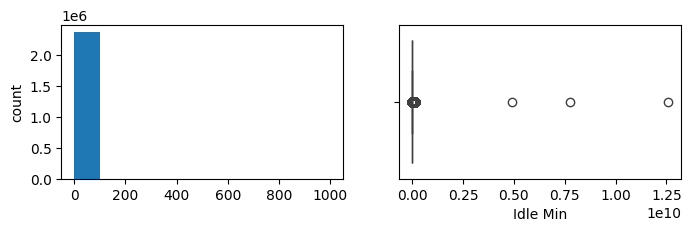

In [ ]:
# histogram and box plot is used to show the pattern of the variables, as some variables have skewness and outliers.

for col in numerical_variables:
    print(col)
    print('Skew :', round(network_data[col].skew(), 2))
    plt.figure(figsize = (8, 2))
    plt.subplot(1, 2, 1)
    #network_data[col].hist(grid=False)
    network_data[col].hist(grid=False, range=[0, 1000])  # Replace 1000 with the maximum value in the column | Set the range parameter to a finite range:
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=network_data[col])
    plt.show()

## Categorical variables are being visualized using a count plot.

In [ ]:
# Print the categorical features
print("Categorical Features:")
for col in categorical_variables.columns:
    print(col)

In [ ]:
# prompt: display all the numerical feature

print("Numerical Features:")
for col in numerical_variables.columns:
    print(col)

# Feature selection

**Deteted columns**:

'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','Bwd Blk Rate Avg'.

‘Flow ID’, ‘Source IP’, ‘Destination IP’, ‘Timestamp’, and ‘Inbound’
These features do not contribute any discriminatory information that could help differentiate between the attack classes.



In [ ]:
print(network_data.columns)

In [12]:
# prompt: in network_data delete columns where all values are zero and timestamp

network_data = network_data.drop(columns=['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg','Bwd Blk Rate Avg', 'Timestamp'])


## The remaining features

In [13]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2472486 entries, 0 to 2476969
Data columns (total 71 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Flow Duration      int64  
 3   Tot Fwd Pkts       int64  
 4   Tot Bwd Pkts       int64  
 5   TotLen Fwd Pkts    int64  
 6   TotLen Bwd Pkts    float64
 7   Fwd Pkt Len Max    int64  
 8   Fwd Pkt Len Min    int64  
 9   Fwd Pkt Len Mean   float64
 10  Fwd Pkt Len Std    float64
 11  Bwd Pkt Len Max    int64  
 12  Bwd Pkt Len Min    int64  
 13  Bwd Pkt Len Mean   float64
 14  Bwd Pkt Len Std    float64
 15  Flow Byts/s        float64
 16  Flow Pkts/s        float64
 17  Flow IAT Mean      float64
 18  Flow IAT Std       float64
 19  Flow IAT Max       float64
 20  Flow IAT Min       float64
 21  Fwd IAT Tot        float64
 22  Fwd IAT Mean       float64
 23  Fwd IAT Std        float64
 24  Fwd IAT Max        float64
 25  Fwd IAT Min        floa

# Feature encoding

In [ ]:
network_data

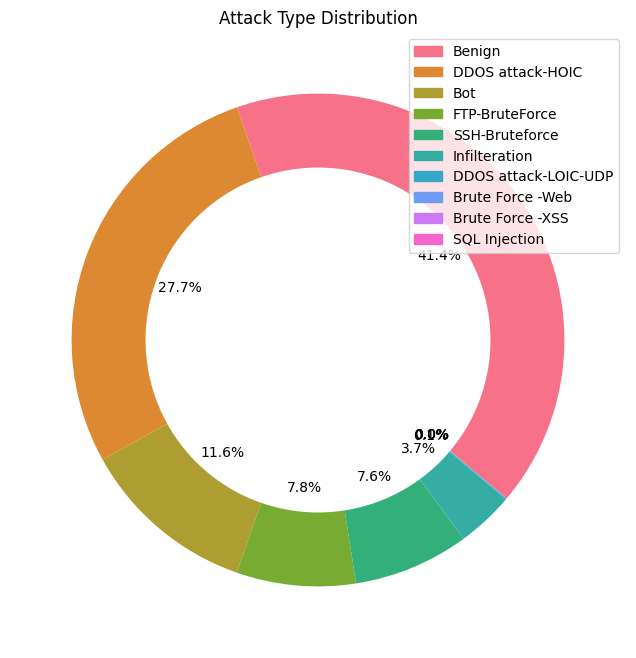

In [ ]:
# prompt: Set up the figure and axes, Create a white circle at the center for a donut chart appearance,Set the title for the plot,reate a pie chart to visualize attack type distribution, Add the white circle to create a donut chart effect,Create legend with custom color patches, Show the plot

import matplotlib.pyplot as plt
# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 8))

# Create a white circle for the center of the donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')

# Set the title for the plot
plt.title("Attack Type Distribution")

# Create a pie chart to visualize attack type distribution
labels = network_data['Label'].value_counts().index.to_list()
colors = sns.color_palette('husl', len(labels))
wedges, texts, autotexts = ax.pie(network_data['Label'].value_counts(), colors=colors, wedgeprops=dict(width=0.4), startangle=-40, autopct='%1.1f%%')

# Add the white circle to create a donut chart effect
ax.add_artist(centre_circle)

# Create legend with custom color patches
custom_patches = [plt.Circle((0, 0), 0.1, color=colors[i]) for i in range(len(labels))]
legend = ax.legend(custom_patches, labels, loc="upper right")

# Show the plot
plt.show()


In [ ]:
# Tranform ‘Label’ column, using  ‘One-Hot Encoding’.

import pandas as pd
network_data = pd.get_dummies(network_data, columns=["Label"])


In [15]:
# prompt: do a Label Encoding on the network_data

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column in network_data:
  if network_data[column].dtype == object:
    network_data[column] = le.fit_transform(network_data[column])


In [16]:
network_data

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641719,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56320859.5,139.300036,56320958.0,56320761.0,0
1,0,0,112641466,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56320733.0,114.551299,56320814.0,56320652.0,0
2,0,0,112638623,3,0,0,0.0,0,0,0.000000,...,0,0.0,0.0,0.0,0.0,56319311.5,301.934596,56319525.0,56319098.0,0
3,22,6,6453966,15,10,1239,2273.0,744,0,82.600000,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
4,22,6,8804066,14,11,1143,2209.0,744,0,81.642857,...,32,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476965,80,6,46,2,0,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
2476966,80,6,277,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
2476967,80,6,331,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8
2476968,80,6,313,2,1,0,0.0,0,0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,8


In [17]:
# prompt: # check for Encoded labels

network_data['Label'].value_counts()


Label
0    1024641
4     686012
1     286191
6     193354
9     187589
7      92403
5       1730
2        362
3        151
8         53
Name: count, dtype: int64

In [47]:
# Separate the dataset into three distinct components based on label categories
benign = network_data[network_data['Label'] == 0]
ddos_attack_hoic = network_data[network_data['Label'] == 1]
Bot = network_data[network_data['Label'] == 2]
FTP_BruteForce = network_data[network_data['Label'] == 3]
SSH_Bruteforce = network_data[network_data['Label'] == 4]
Infilteration = network_data[network_data['Label'] == 5]
DDOS_attack_LOIC_UDP = network_data[network_data['Label'] == 6]
Brute_Force_Web = network_data[network_data['Label'] == 7]
Brute_Force_XSS = network_data[network_data['Label'] == 8]
SQL_Injection = network_data[network_data['Label'] == 9]

# Create the target labels for each category
y_benign = np.zeros(benign.shape[0])
y_ddos_attack_hoic = np.ones(ddos_attack_hoic.shape[0])
y_Bot = np.full(Bot.shape[0], 2)
y_FTP_BruteForce = np.full(FTP_BruteForce.shape[0], 3)
y_SSH_Bruteforce = np.zeros(SSH_Bruteforce.shape[0])
y_Infilteration = np.ones(Infilteration.shape[0])
y_DDOS_attack_LOIC_UDP = np.full(DDOS_attack_LOIC_UDP.shape[0], 6)
y_Brute_Force_Web = np.full(Brute_Force_Web.shape[0], 7)
y_Brute_Force_XSS = np.full(Brute_Force_XSS.shape[0], 8)
y_BSQL_Injection = np.full(SQL_Injection.shape[0], 9)

# Create dataframes for the target labels
y_benign_df = pd.DataFrame(y_benign)
y_ddos_attack_hoic_df = pd.DataFrame(y_ddos_attack_hoic)
y_Bot_df = pd.DataFrame(y_Bot)
y_FTP_BruteForce_df =pd.DataFrame(y_FTP_BruteForce)
y_SSH_Bruteforce_df = pd.DataFrame(y_SSH_Bruteforce)
y_Infilteration_df = pd.DataFrame(y_Infilteration)
y_DDOS_attack_LOIC_UDP_df = pd.DataFrame(y_DDOS_attack_LOIC_UDP)
y_Brute_Force_Web_df = pd.DataFrame(y_Brute_Force_Web)
y_Brute_Force_XSS_df = pd.DataFrame(y_Brute_Force_XSS)
y_BSQL_Injection_df = pd.DataFrame(y_BSQL_Injection)

# Concatenate the dataframes for target labels
y = pd.concat([y_benign_df, y_ddos_attack_hoic_df, y_Bot_df, y_FTP_BruteForce_df, y_SSH_Bruteforce_df, y_Infilteration_df, y_DDOS_attack_LOIC_UDP_df, y_Brute_Force_Web_df, y_Brute_Force_XSS_df, y_BSQL_Injection_df ], sort=True)

# Concatenate the dataframes for features
X = pd.concat([benign, ddos_attack_hoic, Bot, FTP_BruteForce, SSH_Bruteforce, Infilteration, DDOS_attack_LOIC_UDP ,Brute_Force_Web, Brute_Force_Web, SQL_Injection ], sort=True)

In [48]:
y_benign_df, y_ddos_attack_hoic_df, y_Bot_df, y_FTP_BruteForce_df, y_SSH_Bruteforce_df, y_Infilteration_df, y_DDOS_attack_LOIC_UDP_df, y_Brute_Force_Web_df, y_Brute_Force_XSS_df, y_BSQL_Injection_df

(           0
 0        0.0
 1        0.0
 2        0.0
 3        0.0
 4        0.0
 ...      ...
 1024636  0.0
 1024637  0.0
 1024638  0.0
 1024639  0.0
 1024640  0.0
 
 [1024641 rows x 1 columns],
           0
 0       1.0
 1       1.0
 2       1.0
 3       1.0
 4       1.0
 ...     ...
 286186  1.0
 286187  1.0
 286188  1.0
 286189  1.0
 286190  1.0
 
 [286191 rows x 1 columns],
      0
 0    2
 1    2
 2    2
 3    2
 4    2
 ..  ..
 357  2
 358  2
 359  2
 360  2
 361  2
 
 [362 rows x 1 columns],
      0
 0    3
 1    3
 2    3
 3    3
 4    3
 ..  ..
 146  3
 147  3
 148  3
 149  3
 150  3
 
 [151 rows x 1 columns],
           0
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 ...     ...
 686007  0.0
 686008  0.0
 686009  0.0
 686010  0.0
 686011  0.0
 
 [686012 rows x 1 columns],
         0
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
 ...   ...
 1725  1.0
 1726  1.0
 1727  1.0
 1728  1.0
 1729  1.0
 
 [1730 rows x 1 columns],
         0
 0       6
 

In [51]:
from sklearn.utils import resample

# Define the desired number of samples for resampling
desired_samples = 20000

# Perform resampling for each category
data_1_resample = resample(benign, n_samples=desired_samples,
                           random_state=123, replace=True)
data_2_resample = resample(ddos_attack_hoic, n_samples=desired_samples,
                           random_state=123, replace=True)
data_3_resample = resample(Bot, n_samples=desired_samples,
                           random_state=123, replace=True)
data_4_resample = resample(FTP_BruteForce, n_samples=desired_samples,
                           random_state=123, replace=True)
data_5_resample = resample(Infilteration, n_samples=desired_samples,
                           random_state=123, replace=True)
data_6_resample = resample(DDOS_attack_LOIC_UDP, n_samples=desired_samples,
                           random_state=123, replace=True)
data_7_resample = resample(Brute_Force_Web, n_samples=desired_samples,
                           random_state=123, replace=True)
data_8_resample = resample(Brute_Force_XSS, n_samples=desired_samples,
                           random_state=123, replace=True)
data_9_resample = resample(SQL_Injection, n_samples=desired_samples,
                           random_state=123, replace=True)

In [52]:

train_dataset = pd.concat([data_1_resample, data_2_resample, data_3_resample, data_4_resample,data_5_resample, data_6_resample, data_7_resample, data_8_resample, data_9_resample])
train_dataset.head(5)

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1594955,65314,6,1107,5,2,935,325.0,935,0,187.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
660430,53,17,262,1,1,43,59.0,43,43,43.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
409161,53,17,128860,2,2,62,208.0,31,31,31.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
398808,445,6,641441,6,5,455,338.0,140,0,75.833333,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
574458,53,17,49600,1,1,47,107.0,47,47,47.000000,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


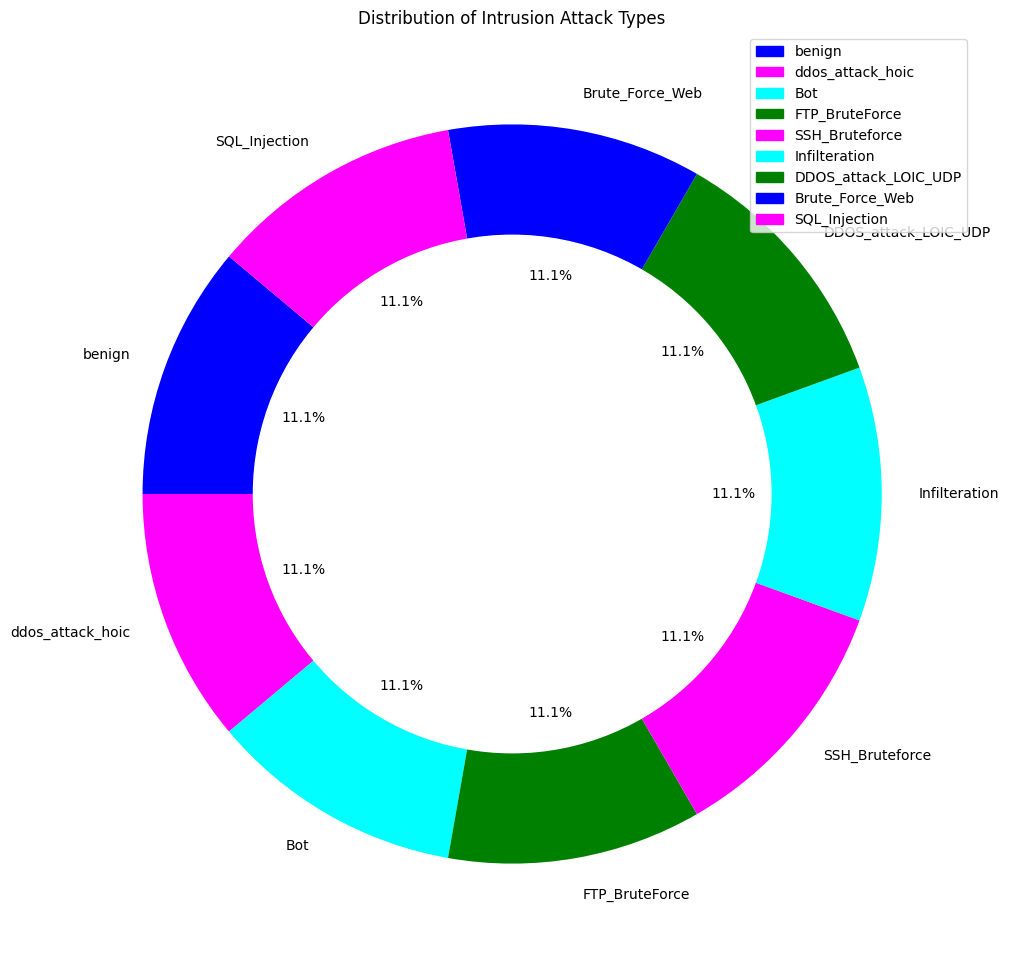

In [62]:
from matplotlib.patches import Patch

# Set up the figure and axes
plt.figure(figsize=(14, 12))

# Create a white circle at the center for a donut chart appearance
circle = plt.Circle((0, 0), 0.7, color='white')

# Set the title for the plot
plt.title('Distribution of Intrusion Attack Types')

# Create a pie chart to visualize attack type distribution
colors = ['blue', 'magenta', 'cyan', 'green','magenta', 'cyan', 'green','blue', 'magenta', 'cyan']
labels = ['benign', 'ddos_attack_hoic', 'Bot', 'FTP_BruteForce', 'SSH_Bruteforce', 'Infilteration', 'DDOS_attack_LOIC_UDP' , 'Brute_Force_Web', 'SQL_Injection']
plt.pie(train_dataset['Label'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add the white circle to create a donut chart effect
p = plt.gcf()
p.gca().add_artist(circle)

# Create legend with custom color patches
legend_handles = [Patch(color=color, label=label) for color, label in zip(colors, labels)]
plt.legend(handles=legend_handles)

In [63]:

# Splitting the dataset for RNN and CNN into training and testing subsets
test_fraction = 0.1  # Fraction of data for testing

# Create a test dataset by randomly selecting a fraction from the training dataset
test_dataset = train_dataset.sample(frac=test_fraction, random_state=42)

# Extracting target labels for training and testing
target_train = train_dataset['Label']
target_test = test_dataset['Label']

# Display unique target labels for training and testing
unique_labels_train = target_train.unique()
unique_labels_test = target_test.unique()

# Print the unique labels for training and testing subsets
print("Unique labels in training dataset:", unique_labels_train)
print("Unique labels in test dataset:", unique_labels_test)

Unique labels in training dataset: [0 1 2 3 5 6 7 8 9]
Unique labels in test dataset: [7 1 3 9 5 0 6 2 8]


In [69]:
# Convert training and testing target labels to one-hot encoded format
y_train = to_categorical(target_train, num_classes=10)
y_test = to_categorical(target_test, num_classes=10)


In [70]:

# Extracting Features from Train and Test Data
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values

# Displaying Test Data Examples
print("Examples in X_test:")
print(X_test)

# Displaying Train Data Examples
print("\nExamples in X_train:")
print(X_train)


Examples in X_test:
[[8.0800000e+02 6.0000000e+00 2.7900000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [4.4500000e+02 6.0000000e+00 1.0126840e+06 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0800000e+03 6.0000000e+00 1.0473000e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [8.0800000e+03 6.0000000e+00 1.0165000e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0000000e+01 6.0000000e+00 5.6908317e+07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [9.0000000e+02 6.0000000e+00 2.8300000e+02 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]

Examples in X_train:
[[6.53140e+04 6.00000e+00 1.10700e+03 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.30000e+01 1.70000e+01 2.62000e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [5.30000e+01 1.70000e+01 1.28860e+05 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 ...
 [2.20000e+01 6.00000e+00 7.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.20000e+01 6.00000e+00 2.95002e+05 ... 0.00000e+00 0.00000e+00

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(180000, 70)
(18000, 70)
(180000, 10)
(18000, 10)


In [72]:
# Reshaping Data for CNN and RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Displaying Shapes of Reshaped Data
print("Shape of X_train_reshaped:", X_train.shape)
print("Shape of X_test_reshaped:", X_test.shape)

Shape of X_train_reshaped: (180000, 70, 1)
Shape of X_test_reshaped: (18000, 70, 1)


In [82]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix
import keras.backend as K
import numpy as np
from keras.callbacks import CSVLogger

# Custom Metrics Definitions
def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))
    fp = cm.sum(axis=0) - np.diag(cm)
    fp_rate = fp / cm.sum(axis=0)
    return K.mean(fp_rate)

def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))
    fn = cm.sum(axis=1) - np.diag(cm)
    fn_rate = fn / cm.sum(axis=1)
    return K.mean(fn_rate)

def precision(y_true, y_pred):
    cm = confusion_matrix(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))
    precision = np.diag(cm) / cm.sum(axis=0)
    return K.mean(precision)

def recall(y_true, y_pred):
    cm = confusion_matrix(K.argmax(y_true, axis=-1), K.argmax(y_pred, axis=-1))
    recall = np.diag(cm) / cm.sum(axis=1)
    return K.mean(recall)

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))

# Creating the Deep Learning Model
def ccn_create_model():
    model = Sequential()

    # Creating the Deep Learning Model
def ccn_create_model():
    model = Sequential()

    # CNN Layer 1
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same', input_shape=(70, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=10, strides=2, padding='same'))

    # CNN Layer 2
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=10, strides=2, padding='same'))

    # CNN Layer 3
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=10, strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

    return model

# Creating an instance of the model
cnn_model = ccn_create_model()


In [83]:

cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 70, 64)            448       
                                                                 
 batch_normalization_9 (Bat  (None, 70, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 35, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 35, 64)            24640     
                                                                 
 batch_normalization_10 (Ba  (None, 35, 64)            256       
 tchNormalization)                                               
                                                     

In [ ]:
from keras.callbacks import CSVLogger

# Create a CSV Logger
csv_logger = CSVLogger('training_logs.csv', append=True)

# Training the CNN Model
history = cnn_model.fit(X_train, y_train, epochs=100, batch_size=32,
                        validation_data=(X_test, y_test), callbacks=[csv_logger])

Epoch 1/100
5625/5625 [==============================] - 45s 7ms/step - loss: 0.5419 - accuracy: 0.7869 - val_loss: 0.6349 - val_accuracy: 0.6859
Epoch 2/100
5625/5625 [==============================] - 36s 6ms/step - loss: 0.4248 - accuracy: 0.8258 - val_loss: 0.7903 - val_accuracy: 0.7388
Epoch 3/100
5625/5625 [==============================] - 37s 7ms/step - loss: 0.3692 - accuracy: 0.8470 - val_loss: 0.6954 - val_accuracy: 0.7613
Epoch 4/100
5625/5625 [==============================] - 36s 6ms/step - loss: 0.3270 - accuracy: 0.8624 - val_loss: 0.5583 - val_accuracy: 0.7321
Epoch 5/100
5625/5625 [==============================] - 37s 7ms/step - loss: 0.3675 - accuracy: 0.8492 - val_loss: 1.5977 - val_accuracy: 0.4363
Epoch 6/100
5625/5625 [==============================] - 37s 7ms/step - loss: 0.3685 - accuracy: 0.8505 - val_loss: 1.9146 - val_accuracy: 0.4662
Epoch 7/100
5625/5625 [==============================] - 36s 6ms/step - loss: 0.3769 - accuracy: 0.8477 - val_loss: 0.9149 -

## Normalization